In [1]:
#pip install -U seaborn

In [2]:
#numpy, statistics
import numpy as np
import statistics

### numpy 구할 수 있는 지표
- 평균
- 중위값, 최대,최소
- 분산, 표준편차
- 범위수(4분위수), 상관계수

In [3]:
# 대개 요약지표에서 우린 대표값으로 평균을 고른다
data = np.array([1,2,3,4,5,6,7,8,9,10])

In [4]:
# 평균 잡는 법
np.mean(data) #np.기초 통계치

5.5

In [5]:
print(np.median(data))
print(np.std(data))
print(np.var(data))
print(np.min(data))
print(np.max(data))
print(np.argmax(data)) #최댓값 인덱스 반환
print(np.argmin(data))# 최솟값 인덱스 반환

print(np.percentile(data, 25)) #4분위수 뽑기
print(np.percentile(data, 75))

5.5
2.8722813232690143
8.25
1
10
9
0
3.25
7.75


In [6]:
#상관계수 뽑기
data = np.array([1,2,3,4,5,6,7,8,9,10])
data2 = np.array([11,12,13,14,15,16,17,18,19,20])
np.corrcoef(data,data2)

array([[1., 1.],
       [1., 1.]])

In [7]:
# stataics: median, variance, stdev, harmonic_mean(다른 평균)
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Mean
print(statistics.mean(data))

# Median
print(statistics.median(data))

# Variance
print(statistics.variance(data))

# Standard Deviation
print(statistics.stdev(data))

5.5
5.5
9.166666666666666
3.0276503540974917


### 타이타닉 시각화 진행
- 데이터 타입과 시각화를 하게되면 차원(1차원, 2차원)에 따른 시각화가 달라짐

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='survived', ylabel='count'>

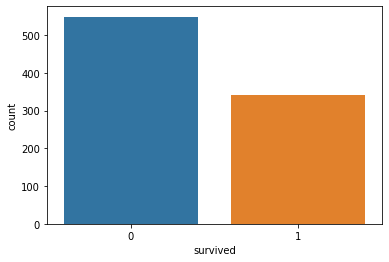

In [10]:
# 생존 count로 시각화
sns.countplot(x = 'survived', data = df)

<AxesSubplot:xlabel='sex', ylabel='count'>

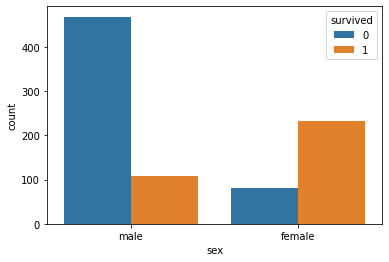

In [11]:
#성별에 다른 생존 유무
# 생존만 봤는데 -> 이젠 생존과 성별
# 성별별로 생존율로 색구분 -> 여성이 생존률이 더 높았다
sns.countplot(x = 'sex', hue = 'survived', data = df)

<AxesSubplot:xlabel='survived', ylabel='count'>

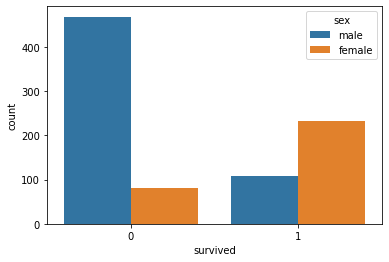

In [12]:
sns.countplot(x = 'survived', hue = 'sex', data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

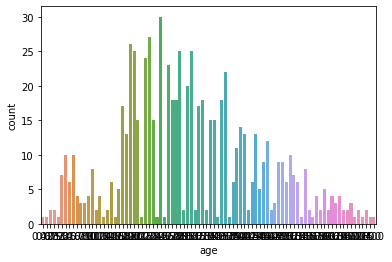

In [13]:
# 연속적인 값을 넣게 된다면? ex. 나이
# age그래프로 그려보자 -> countplot이랑 맞지 않음
sns.countplot(x = 'age', data = df)

AttributeError: 'Rectangle' object has no property 'range'

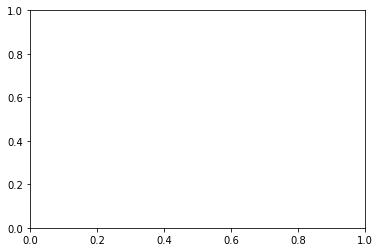

In [14]:
# 분포가 다른 그래프를 그려보자
sns.histplot(df['age'], kde=True, bins=10, range=(0, 100)) #age를 범주화. range

<AxesSubplot:xlabel='age', ylabel='Count'>

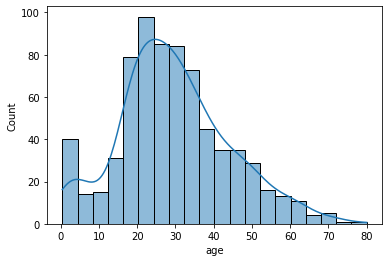

In [15]:
sns.histplot(df['age'], kde=True, bins=20)

<AxesSubplot:xlabel='age', ylabel='Count'>

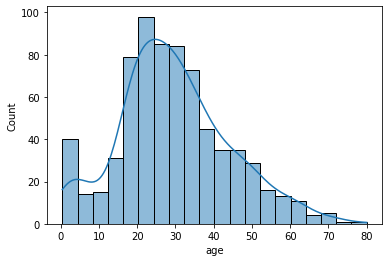

In [16]:
sns.histplot(df['age'], kde=True, bins=20)

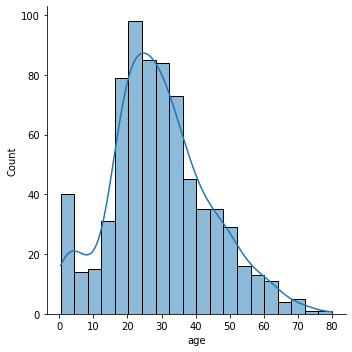

In [17]:
sns.displot(df['age'], kde=True, bins=20)

<AxesSubplot:xlabel='fare', ylabel='Count'>

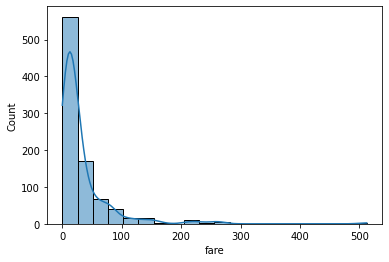

In [18]:
# 요금 붙포 _ 그리다보면 정규분포 중요성에 공감을 하게 될 것
sns.histplot(df['fare'], kde = True, bins = 20)

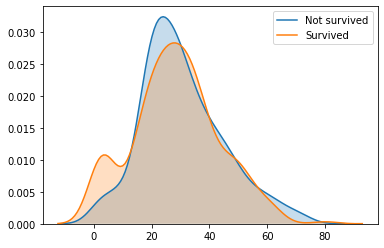

In [30]:
# 생존자와 비생존자에 대한 나이 붙포 : kdeplot
sns.kdeplot(df.loc[df['survived'] == 0, 'age'], label = 'Not survived', shade = True)
sns.kdeplot(df.loc[df['survived'] == 1, 'age'], label = 'Survived', shade = True)
plt.legend()

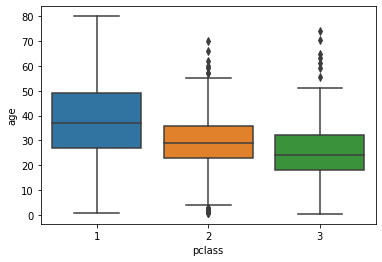

In [31]:
# 이상치를 간단하게 살펴볼 수 있는 boxplot
sns.boxplot(x = 'pclass', y ='age', data = df)
plt.show()

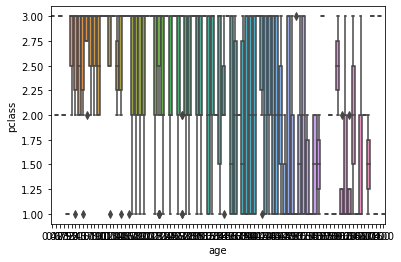

In [32]:
# 너무 많은 값을 x축으로 넣어버리면 그래프가 비효율적으로 바뀐다
sns.boxplot(x = 'age', y ='pclass', data = df)
plt.show()

In [33]:
import pandas as pd
df = pd.read_csv("BDA_scores_em.csv")
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


In [34]:
sum(df.english)/ len(df) #간단하게 평균 구하기 가능

58.38

In [35]:
df.english.mean() #판다스에서도 기초통계치 구하기 가능

58.38

In [36]:
df.english.std()

9.799812576300235

In [37]:
df.describe()

,student number,english,mathematics
count,50.00000,50.000000,50.000000
mean,25.50000,58.380000,78.880000
std,14.57738,9.799813,8.414371
min,1.00000,37.000000,57.000000
25%,13.25000,54.000000,76.000000
50%,25.50000,57.500000,80.000000
75%,37.75000,65.000000,84.000000
max,50.00000,79.000000,94.000000


## 중앙값
- 데이터 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값
- 홀수면 중앙이 나온다. 짝수면 두개의 값을 평균으로 계산. 

- 중앙값은 평균값에 비해서는 이상치에 영향을 덜받는다.
- 평균으로 계산하는게 아니라, 중앙값으로 대치해서 MSE 바꿔서 중ㅇ앙값으로 바꿔서 계산하고 하는 이유
    - 데이터 자체에 이상치가 큰 경우 아무래도 대푯값을 평균보다는 중앙값이 적절하다. (도메인 고려)

## 최빈값
- mode 가장 많이 나타내는 값. 1,2,3,4 면 1이 최빈

## 평균
- 반박의 여지 없는 대표값

## 데이터 산포도를 찾아보는

### 편차
- 평균으로부터 얼마나 떨어져있는가

### 분산
- 산포도의 지표로 데이터의 평균간의 차이를 이용하여 분산은 편차를 제곱

### 표준편차
- 산포도 지표로 분산에 제곱근을 취한것이 표준편차

In [39]:
# 표준편차 연산
df_eng_mean = np.mean(df.english)
df['eng_dv'] = df.english - df_eng_mean

In [41]:
df['eng_dv']

0    -16.38
1     10.62
2     -2.38
3    -17.38
4     -1.38
5    -10.38
6      6.62
7     -9.38
8      6.62
9     -0.38
10    11.62
11   -11.38
12    -7.38
13     5.62
14     3.62
15    11.62
16    12.62
17     9.62
18    14.62
19   -21.38
20     6.62
21     6.62
22     2.62
23    -6.38
24    -1.38
25    -1.38
26    16.62
27     2.62
28   -11.38
29    -4.38
30     7.62
31    -4.38
32    -4.38
33   -16.38
34   -21.38
35    20.62
36    -2.38
37     3.62
38     3.62
39    -3.38
40     4.62
41    -1.38
42    -1.38
43     8.62
44    -3.38
45   -13.38
46     7.62
47    -3.38
48     5.62
49     7.62
Name: eng_dv, dtype: float64

In [43]:
np.mean(df['eng_dv']**2)

94.11560000000001

In [44]:
np.var(df.english)

94.11560000000001

### 사분위 범위, 범위
- 범위는 range
- 분산이나 표준편차와는 다르게 데이터 전체를 보는 것이 아니다
- 최댓값, 최솟값으로만 산포도를 표현하는 것
- 최댓값과 최솟값이 차이가 크면 산포도가 크고, 차이가 작으면 작다.
- Rg = X.max - X.min

In [45]:
np.max(df.english) - np.min(df.english)

42

- 사분위 범위
- 범위도 결국, 최대, 최소로 계산하는 것 -> 이상치가 크며녀 변화가 크다
- 사분위 범위 interquartile range
- 데이터를 1로 보면 하위 25%, 중위 50%, 상위 75%
- 제 1사분위 수 , 제2사분위수(50%), 제 3사분위수 Q1~Q3
- IQR = Q3 ~ Q1

### 데이터의 정규화
- normalization 데이터의 정규화
- 동일한 시험 점수더라도 평균이 30점인 시험에서 ( = 어려운 시험)에서 60과 쉬운 시험(평균 90)에서 60을 받은 것은 다르다
- 평균이나 분산에 따라서 값이 달라진다.

- 평균이나 분산에의존하지 않고 데이터의 상대적인 위치관계를 알 수 있는 지표는 무엇인가?
- 가장 대표적인 것이 편찻값
- 개념: 데이터 분석 시 데이터를 정규화 하여 수치를 맞추는 작업
- 표준화라는 개념도 존재(standardization) = Z-score 점수
- 각 데이터의 값과 표준화한 z값으로 비교.
